In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Dividend_Yield.csv
/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Earnings.csv
/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_P_E_ratio.csv
/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Revenue.csv
/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Market_Cap.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading datasets

In [3]:
dataset_1=pd.read_csv("/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Dividend_Yield.csv")
dataset_1

,Rank,Name,Symbol,dividend_yield_ttm,price (GBP),country
0,1,LianBio,LIAN,300940.0,0.243065,United States
1,2,Richter Gedeon,RIG2.F,150430.0,23.726825,Hungary
2,3,Delek Group,DLEKG.TA,117114.0,87.735884,Israel
3,4,LMP Automotive Holdings,LMPX,106250.0,0.121914,United States
4,5,MBIA,MBI,22346.4,2.727817,United States
...,...,...,...,...,...,...
9907,9908,Lite-On Technology,2301.TW,0.0,2.366853,Taiwan
9908,9909,Zensho Holdings,7550.T,0.0,42.447877,Japan
9909,9910,BKV Corporation,BKV,0.0,13.867596,United States
9910,9911,BioAge Labs,BIOA,0.0,16.679304,United States


In [4]:
dataset_2=pd.read_csv("/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Earnings.csv")
dataset_2

,Rank,Name,Symbol,earnings_ttm,price (GBP),country
0,1,Saudi Aramco,2222.SR,2.283780e+11,5.505405,Saudi Arabia
1,2,Apple,AAPL,1.216250e+11,176.734336,United States
2,3,Microsoft,MSFT,1.077870e+11,326.461762,United States
3,4,Alphabet (Google),GOOG,1.018210e+11,126.279631,United States
4,5,Berkshire Hathaway,BRK-B,8.890400e+10,347.625201,United States
...,...,...,...,...,...,...
9907,9908,Vodafone,VOD,-7.932050e+09,7.657698,United Kingdom
9908,9909,Warner Bros. Discovery,WBD,-9.890000e+09,6.217594,United States
9909,9910,Walgreens Boots Alliance,WBA,-1.309100e+10,6.861450,United States
9910,9911,Veolia,VIE.PA,-1.444810e+10,24.849801,France


In [5]:
dataset_3=pd.read_csv("/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_P_E_ratio.csv")
dataset_3

,Rank,Name,Symbol,pe_ratio_ttm,price (GBP),country
0,1,Imperial Petroleum,IMPP,0.109943,3.108797,Greece
1,2,Vertex Energy,VTNR,0.188889,0.092197,United States
2,3,Spin Master,TOY.TO,0.224758,17.414443,Canada
3,4,Performance Shipping,PSHG,0.225293,1.467916,Greece
4,5,TherapeuticsMD,TXMD,0.340956,1.280093,United States
...,...,...,...,...,...,...
9907,9908,MBX Biosciences,MBX,0.000000,18.500389,United States
9908,9909,Bicara Therapeutics,BCAX,-70.666700,18.896608,United States
9909,9910,Zensho Holdings,7550.T,275.203000,42.447877,Japan
9910,9911,BKV Corporation,BKV,-12.410500,13.867596,United States


In [6]:
dataset_4=pd.read_csv("/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Revenue.csv")
dataset_4

,Rank,Name,Symbol,revenue_ttm,price (GBP),country
0,1,Walmart,WMT,665035000000,61.029186,United States
1,2,Amazon,AMZN,604334000000,143.454209,United States
2,3,Saudi Aramco,2222.SR,495354806850,5.505405,Saudi Arabia
3,4,Sinopec,600028.SS,435696880608,0.748295,China
4,5,PetroChina,601857.SS,429671599508,0.969769,China
...,...,...,...,...,...,...
9907,9908,Kinnevik,KINV-A.ST,-755524598,6.067929,Sweden
9908,9909,Sofina,SOF.VI,-1960650040,212.106043,Belgium
9909,9910,Quilter,QLT.L,-4921465842,1.331998,United Kingdom
9910,9911,M&G plc,MNG.L,-10545825404,2.073004,United Kingdom


In [7]:
dataset_5=pd.read_csv("/kaggle/input/largest-companies-analysis-worldwide/Companies_ranked_by_Market_Cap.csv")
dataset_5

,Rank,Name,Symbol,marketcap,price (GBP),country
0,1,Apple,AAPL,2.689903e+12,176.919492,United States
1,2,Microsoft,MSFT,2.427170e+12,326.537958,United States
2,3,NVIDIA,NVDA,2.259353e+12,92.105725,United States
3,4,Alphabet (Google),GOOG,1.549815e+12,126.458691,United States
4,5,Amazon,AMZN,1.506038e+12,143.492307,United States
...,...,...,...,...,...,...
9907,9908,Dubai Taxi Company,DTC.AE,0.000000e+00,0.000000,United Arab Emirates
9908,9909,Emirates Central Cooling Systems,EMPOWER.AE,0.000000e+00,0.000000,United Arab Emirates
9909,9910,Ajman Bank,AJMANBANK.AE,0.000000e+00,0.000000,United Arab Emirates
9910,9911,Al Ansari Financial Services,ALANSARI.AE,0.000000e+00,0.000000,United Arab Emirates


# Data Cleaning


In [8]:
dataset_1.isnull().sum()

Rank                  0
Name                  0
Symbol                1
dividend_yield_ttm    0
price (GBP)           0
country               2
dtype: int64

In [9]:

dataset_1[dataset_1[['Symbol', 'country']].isnull().any(axis=1)]


,Rank,Name,Symbol,dividend_yield_ttm,price (GBP),country
2255,2256,Bank of the Philippine Islands,BPHLY,265.417,31.659438,NaN
6991,6992,Ceconomy,CEC.DE,0.000,2.752649,NaN
7619,7620,Nano Labs,NaN,0.000,0.622598,China


In [10]:
dataset_1.dropna(inplace=True)

In [11]:
dataset_1.isnull().sum()

Rank                  0
Name                  0
Symbol                0
dividend_yield_ttm    0
price (GBP)           0
country               0
dtype: int64

In [12]:
# check duplicates in dataset
dataset_1.duplicated().any()

False

In [13]:
dataset_1.dtypes

Rank                    int64
Name                   object
Symbol                 object
dividend_yield_ttm    float64
price (GBP)           float64
country                object
dtype: object

In [14]:
dataset_2.isnull().sum()

Rank            0
Name            0
Symbol          1
earnings_ttm    0
price (GBP)     0
country         2
dtype: int64

In [15]:
# remove null valves
dataset_2.dropna(inplace=True)
dataset_2.isnull().sum()

Rank            0
Name            0
Symbol          0
earnings_ttm    0
price (GBP)     0
country         0
dtype: int64

In [16]:
# check duplicates in dataset
dataset_2.duplicated().any()

False

In [17]:
dataset_2.dtypes

Rank              int64
Name             object
Symbol           object
earnings_ttm    float64
price (GBP)     float64
country          object
dtype: object

In [18]:
# check null values in dataset
dataset_3.isnull().sum()

Rank            0
Name            0
Symbol          1
pe_ratio_ttm    0
price (GBP)     0
country         2
dtype: int64

In [19]:
# remove null valves
dataset_3.dropna(inplace=True)
dataset_3.isnull().sum()

Rank            0
Name            0
Symbol          0
pe_ratio_ttm    0
price (GBP)     0
country         0
dtype: int64

In [20]:
# check duplicates in dataset
dataset_3.duplicated().any()

False

In [21]:
dataset_3.dtypes

Rank              int64
Name             object
Symbol           object
pe_ratio_ttm    float64
price (GBP)     float64
country          object
dtype: object

In [22]:
# check null values in dataset
dataset_4.isnull().sum()

Rank           0
Name           0
Symbol         1
revenue_ttm    0
price (GBP)    0
country        2
dtype: int64

In [23]:
# remove null valves
dataset_4.dropna(inplace=True)
dataset_4.isnull().sum()

Rank           0
Name           0
Symbol         0
revenue_ttm    0
price (GBP)    0
country        0
dtype: int64

In [24]:
# check duplicates in dataset
dataset_4.duplicated().any()

False

In [25]:
dataset_4.dtypes

Rank             int64
Name            object
Symbol          object
revenue_ttm      int64
price (GBP)    float64
country         object
dtype: object

In [26]:
# check null values in dataset
dataset_5.isnull().sum()

Rank           0
Name           0
Symbol         1
marketcap      0
price (GBP)    0
country        2
dtype: int64

In [27]:
# remove null valves
dataset_5.dropna(inplace=True)
dataset_5.isnull().sum()

Rank           0
Name           0
Symbol         0
marketcap      0
price (GBP)    0
country        0
dtype: int64

In [28]:
# check duplicates in dataset
dataset_5.duplicated().any()

False

In [29]:
dataset_5.dtypes

Rank             int64
Name            object
Symbol          object
marketcap      float64
price (GBP)    float64
country         object
dtype: object

#  Identify the top companies by Revenue and Earnings to understand which companies lead in volume and profitability.

In [30]:
# merging datasets
merge_dataset=pd.merge(dataset_2,dataset_4,how="inner",on="Rank")
merge_dataset

,Rank,Name_x,Symbol_x,earnings_ttm,price (GBP)_x,country_x,Name_y,Symbol_y,revenue_ttm,price (GBP)_y,country_y
0,1,Saudi Aramco,2222.SR,2.283780e+11,5.505405,Saudi Arabia,Walmart,WMT,665035000000,61.029186,United States
1,2,Apple,AAPL,1.216250e+11,176.734336,United States,Amazon,AMZN,604334000000,143.454209,United States
2,3,Microsoft,MSFT,1.077870e+11,326.461762,United States,Saudi Aramco,2222.SR,495354806850,5.505405,Saudi Arabia
3,4,Alphabet (Google),GOOG,1.018210e+11,126.279631,United States,Sinopec,600028.SS,435696880608,0.748295,China
4,5,Berkshire Hathaway,BRK-B,8.890400e+10,347.625201,United States,PetroChina,601857.SS,429671599508,0.969769,China
...,...,...,...,...,...,...,...,...,...,...,...
9901,9908,Vodafone,VOD,-7.932050e+09,7.657698,United Kingdom,Kinnevik,KINV-A.ST,-755524598,6.067929,Sweden
9902,9909,Warner Bros. Discovery,WBD,-9.890000e+09,6.217594,United States,Sofina,SOF.VI,-1960650040,212.106043,Belgium
9903,9910,Walgreens Boots Alliance,WBA,-1.309100e+10,6.861450,United States,Quilter,QLT.L,-4921465842,1.331998,United Kingdom
9904,9911,Veolia,VIE.PA,-1.444810e+10,24.849801,France,M&G plc,MNG.L,-10545825404,2.073004,United Kingdom


<Axes: title={'center': 'Revenue vs Earnings'}, xlabel='revenue_ttm', ylabel='earnings_ttm'>

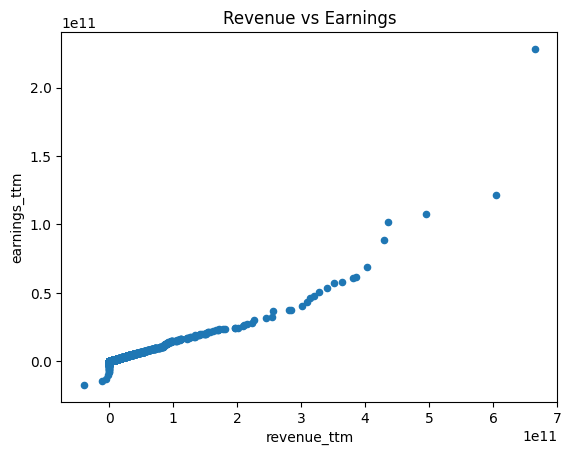

In [31]:
merge_dataset.plot.scatter(x='revenue_ttm',y='earnings_ttm',title='Revenue vs Earnings')

#  Rank companies by Market Capitalization to identify the largest players in the stock market.

In [32]:

top_companies = dataset_5.sort_values(by='marketcap', ascending=False).head(10)
bottom_companies = dataset_5.sort_values(by='marketcap').head(10)
print("Top 10 Companies by Market Cap:\n", top_companies)
print("\nBottom 10 Companies by Market Cap:\n", bottom_companies)


Top 10 Companies by Market Cap:
    Rank                       Name   Symbol     marketcap  price (GBP)  \
0     1                      Apple     AAPL  2.689903e+12   176.919492   
1     2                  Microsoft     MSFT  2.427170e+12   326.537958   
2     3                     NVIDIA     NVDA  2.259353e+12    92.105725   
3     4          Alphabet (Google)     GOOG  1.549815e+12   126.458691   
4     5                     Amazon     AMZN  1.506038e+12   143.492307   
5     6               Saudi Aramco  2222.SR  1.348543e+12     5.505405   
6     7  Meta Platforms (Facebook)     META  1.095756e+12   433.136162   
7     8         Berkshire Hathaway    BRK-B  7.492296e+11   347.667109   
8     9                       TSMC      TSM  6.952419e+11   134.059242   
9    10                      Tesla     TSLA  6.399479e+11   200.319284   

         country  
0  United States  
1  United States  
2  United States  
3  United States  
4  United States  
5   Saudi Arabia  
6  United States  


In [33]:
#  Market Cap by Country Analysis
market_cap_country=dataset_5.groupby('country')['marketcap'].sum().sort_values(ascending=False).nlargest(1)
market_cap_country

country
United States    4.467134e+13
Name: marketcap, dtype: float64

# Compare Market Cap with the Price-to-Earnings (P/E) Ratio to analyze growth potential

In [34]:
# merging the datasets
merge_with_earnings=pd.merge(dataset_5,dataset_3,how='inner',on='Rank')
merge_with_earnings

,Rank,Name_x,Symbol_x,marketcap,price (GBP)_x,country_x,Name_y,Symbol_y,pe_ratio_ttm,price (GBP)_y,country_y
0,1,Apple,AAPL,2.689903e+12,176.919492,United States,Imperial Petroleum,IMPP,0.109943,3.108797,Greece
1,2,Microsoft,MSFT,2.427170e+12,326.537958,United States,Vertex Energy,VTNR,0.188889,0.092197,United States
2,3,NVIDIA,NVDA,2.259353e+12,92.105725,United States,Spin Master,TOY.TO,0.224758,17.414443,Canada
3,4,Alphabet (Google),GOOG,1.549815e+12,126.458691,United States,Performance Shipping,PSHG,0.225293,1.467916,Greece
4,5,Amazon,AMZN,1.506038e+12,143.492307,United States,TherapeuticsMD,TXMD,0.340956,1.280093,United States
...,...,...,...,...,...,...,...,...,...,...,...
9901,9908,Dubai Taxi Company,DTC.AE,0.000000e+00,0.000000,United Arab Emirates,MBX Biosciences,MBX,0.000000,18.500389,United States
9902,9909,Emirates Central Cooling Systems,EMPOWER.AE,0.000000e+00,0.000000,United Arab Emirates,Bicara Therapeutics,BCAX,-70.666700,18.896608,United States
9903,9910,Ajman Bank,AJMANBANK.AE,0.000000e+00,0.000000,United Arab Emirates,Zensho Holdings,7550.T,275.203000,42.447877,Japan
9904,9911,Al Ansari Financial Services,ALANSARI.AE,0.000000e+00,0.000000,United Arab Emirates,BKV Corporation,BKV,-12.410500,13.867596,United States


In [35]:
# find correlation between market cap and growth potential
correlation = merge_with_earnings[['marketcap', 'pe_ratio_ttm']].corr()
print("Correlation between Market Cap and P/E Ratio:\n", correlation)

Correlation between Market Cap and P/E Ratio:
               marketcap  pe_ratio_ttm
marketcap      1.000000      0.001024
pe_ratio_ttm   0.001024      1.000000


In [36]:
# Percentage of Total Market Cap
total_market_cap=merge_with_earnings['marketcap'].sum()
merge_with_earnings['Market Cap %']=(merge_with_earnings['marketcap']/total_market_cap*100.0)
merge_with_earnings['Market Cap %']

0       3.104630
1       2.801389
2       2.607699
3       1.788764
4       1.738238
          ...   
9901    0.000000
9902    0.000000
9903    0.000000
9904    0.000000
9905    0.000000
Name: Market Cap %, Length: 9906, dtype: float64

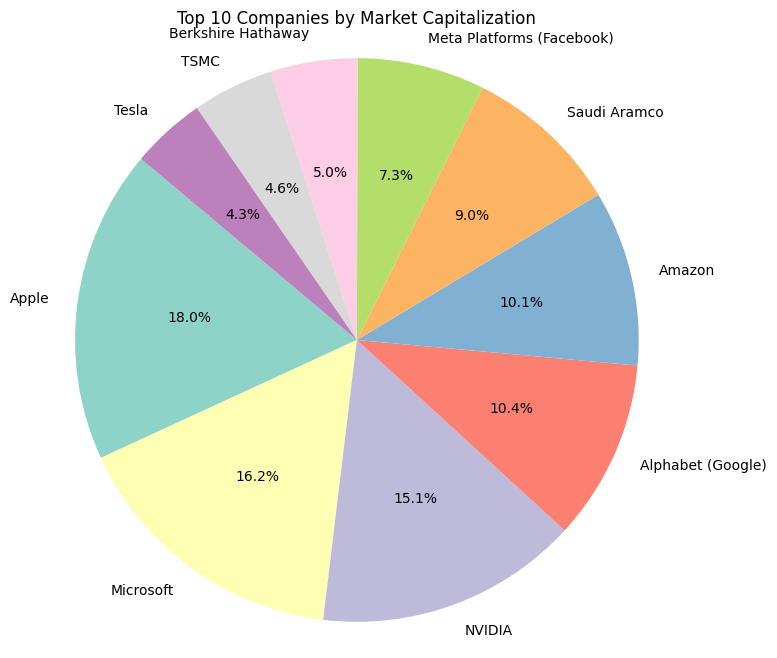

In [37]:
# Select top 10 companies by market cap
top_10_marketcap = merge_with_earnings.nlargest(10, 'marketcap')

# Plotting pie chart for top 10 companies by market cap
plt.figure(figsize=(8, 8))
plt.pie(top_10_marketcap['marketcap'], labels=top_10_marketcap['Name_x'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Top 10 Companies by Market Capitalization')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#  Evaluate how effectively companies convert revenue into earnings to assess profitability.

In [38]:
#merge the datasets
merge_with_revenue=pd.merge(dataset_2,dataset_4,how='inner',on='Rank')
merge_with_revenue

,Rank,Name_x,Symbol_x,earnings_ttm,price (GBP)_x,country_x,Name_y,Symbol_y,revenue_ttm,price (GBP)_y,country_y
0,1,Saudi Aramco,2222.SR,2.283780e+11,5.505405,Saudi Arabia,Walmart,WMT,665035000000,61.029186,United States
1,2,Apple,AAPL,1.216250e+11,176.734336,United States,Amazon,AMZN,604334000000,143.454209,United States
2,3,Microsoft,MSFT,1.077870e+11,326.461762,United States,Saudi Aramco,2222.SR,495354806850,5.505405,Saudi Arabia
3,4,Alphabet (Google),GOOG,1.018210e+11,126.279631,United States,Sinopec,600028.SS,435696880608,0.748295,China
4,5,Berkshire Hathaway,BRK-B,8.890400e+10,347.625201,United States,PetroChina,601857.SS,429671599508,0.969769,China
...,...,...,...,...,...,...,...,...,...,...,...
9901,9908,Vodafone,VOD,-7.932050e+09,7.657698,United Kingdom,Kinnevik,KINV-A.ST,-755524598,6.067929,Sweden
9902,9909,Warner Bros. Discovery,WBD,-9.890000e+09,6.217594,United States,Sofina,SOF.VI,-1960650040,212.106043,Belgium
9903,9910,Walgreens Boots Alliance,WBA,-1.309100e+10,6.861450,United States,Quilter,QLT.L,-4921465842,1.331998,United Kingdom
9904,9911,Veolia,VIE.PA,-1.444810e+10,24.849801,France,M&G plc,MNG.L,-10545825404,2.073004,United Kingdom


In [39]:
merge_with_revenue['earnings_to_revenue']=merge_with_revenue['earnings_ttm']/merge_with_revenue['revenue_ttm']
high_profitability=merge_with_revenue.sort_values(by='earnings_to_revenue',ascending=False)
high_profitability

,Rank,Name_x,Symbol_x,earnings_ttm,price (GBP)_x,country_x,Name_y,Symbol_y,revenue_ttm,price (GBP)_y,country_y,earnings_to_revenue
9872,9879,Covivio,COV.PA,-2.332630e+09,46.187044,France,Immutep,IMMP,-276,1.722030,Australia,8.451558e+06
9873,9880,EchoStar,SATS,-2.333230e+09,19.262349,United States,SGT German Private Equity,GAI.DE,-286777,0.713493,Germany,8.136043e+03
9874,9881,IHS Towers,IHS,-2.359890e+09,2.312549,United Kingdom,Applied Therapeutics,APLT,-333000,6.408084,United States,7.086757e+03
9875,9882,Phoenix Group,PHNX.L,-2.457100e+09,5.630001,United Kingdom,Denison Mines,DNN,-518240,1.401244,Canada,4.741240e+03
9876,9883,Ørsted,DOGEF,-2.469340e+09,50.975124,Denmark,Phunware,PHUN,-1470000,2.659240,United States,1.679823e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
9485,9492,Sable Offshore,SOC,-2.215760e+08,18.088930,United States,IO Biotech,IOBT,0,0.800058,Denmark,-inf
9486,9493,Kingsoft Cloud,KC,-2.218310e+08,2.369696,China,LianBio,LIAN,0,0.243065,United States,-inf
9487,9494,HUTCHMED,HCM,-2.218990e+08,15.170624,Hong Kong,Aura Biosciences,AURA,0,7.017652,United States,-inf
9488,9495,Verve Therapeutics,VERV,-2.219650e+08,3.771702,United States,Context Therapeutics,CNTX,0,1.447724,United States,-inf


# visualize

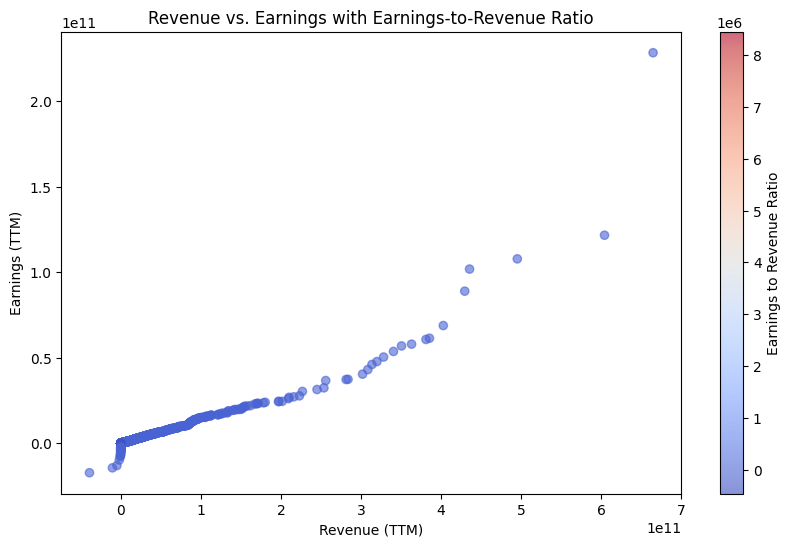

In [40]:
# Scatter plot of revenue vs earnings with color representing earnings-to-revenue ratio
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=merge_with_revenue['revenue_ttm'], 
                      y=merge_with_revenue['earnings_ttm'],
                      c=merge_with_revenue['earnings_to_revenue'], 
                      cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Earnings to Revenue Ratio')
plt.xlabel('Revenue (TTM)')
plt.ylabel('Earnings (TTM)')
plt.title('Revenue vs. Earnings with Earnings-to-Revenue Ratio')
plt.show()


#  Identify potential value stocks that offer both a high dividend yield and a low P/E ratio, which could be attractive for income-focused investors.

In [41]:
merge_with_dividend_yield=pd.merge(dataset_1,merge_with_earnings,how='inner',on='Rank')
median_pe=merge_with_dividend_yield['pe_ratio_ttm'].median()
high_dividend_ratio=merge_with_dividend_yield[(merge_with_dividend_yield['dividend_yield_ttm']>merge_with_dividend_yield['dividend_yield_ttm'].mean()) & (merge_with_dividend_yield['pe_ratio_ttm']<median_pe)]
print("High Dividend Yield & Low P/E Ratio Companies:\n", merge_with_dividend_yield[['Name', 'dividend_yield_ttm', 'pe_ratio_ttm']])

High Dividend Yield & Low P/E Ratio Companies:
                          Name  dividend_yield_ttm  pe_ratio_ttm
0                     LianBio            300940.0      0.109943
1              Richter Gedeon            150430.0      0.188889
2                 Delek Group            117114.0      0.224758
3     LMP Automotive Holdings            106250.0      0.225293
4                        MBIA             22346.4      0.340956
...                       ...                 ...           ...
9898       Lite-On Technology                 0.0      0.000000
9899          Zensho Holdings                 0.0    -70.666700
9900          BKV Corporation                 0.0    275.203000
9901              BioAge Labs                 0.0    -12.410500
9902         Legacy Education                 0.0      0.000000

[9903 rows x 3 columns]


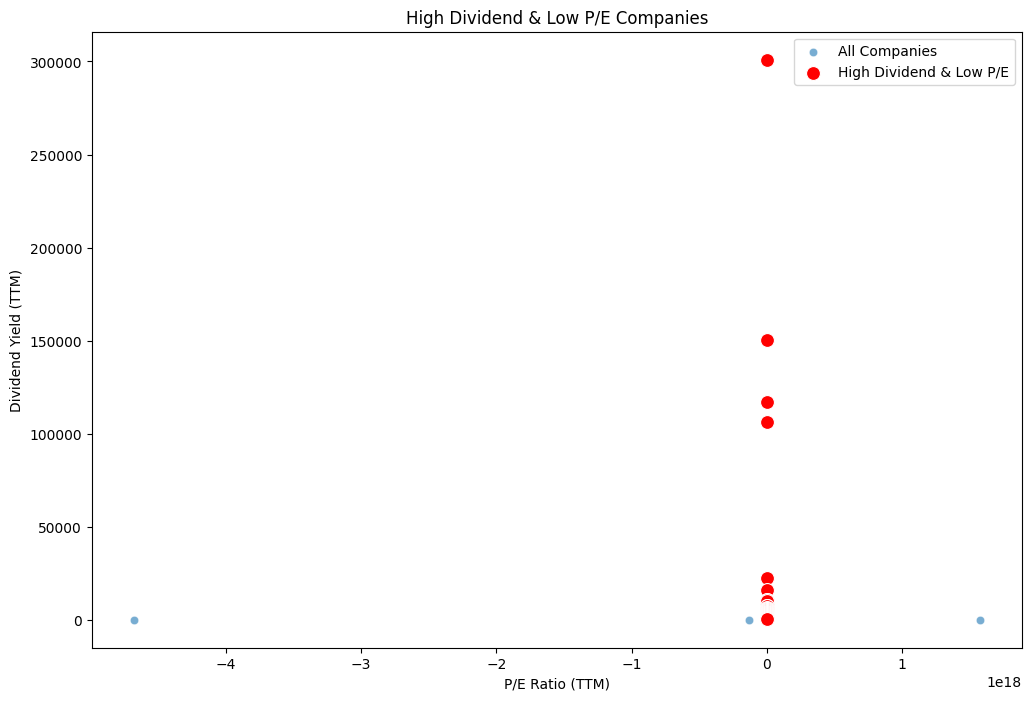

In [42]:
# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merge_with_dividend_yield, x='pe_ratio_ttm', y='dividend_yield_ttm', label='All Companies', alpha=0.6)
sns.scatterplot(data=high_dividend_ratio, x='pe_ratio_ttm', y='dividend_yield_ttm', color='red', label='High Dividend & Low P/E', s=100)

# Labels and Title
plt.xlabel('P/E Ratio (TTM)')
plt.ylabel('Dividend Yield (TTM)')
plt.title('High Dividend & Low P/E Companies')
plt.legend()
plt.show()